# Dataset preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
corpus_folder = './corpus/'
data_folder = './data/'

## Stage 1: High Level Categorization

[Original dataset](https://github.com/SALT-NLP/implicit-hate)

In [5]:
df_hate = pd.read_csv(corpus_folder + 'implicit_hate_v1_stg1_posts.tsv', sep = '\t')

In [6]:
# Create internal id for reference
df_hate['post_id'] = range(len(df_hate))
df_hate['post_id'] = df_hate['post_id'] + 1
df_hate = df_hate[ ['post_id'] + [ col for col in df_hate.columns if col != 'post_id' ] ]

In [7]:
df_hate.head()

,post_id,post,class
0,1,""" : jewish harvard professor noel ignatiev w...",implicit_hate
1,2,b.higher education is a part of european cult...,not_hate
2,3,"has a problem with "" the whites "" "" and "" "" ...",not_hate
3,4,is yasir qadhi a hate preacher for calling ch...,not_hate
4,5,"rt "" : how three million germans mass murder...",not_hate


In [8]:
len(df_hate)

21480

In [9]:
df_hate['class'].unique()

array(['implicit_hate', 'not_hate', 'explicit_hate'], dtype=object)

In [10]:
df_hate.groupby(['class'])['post'].count()

class
explicit_hate     1089
implicit_hate     7100
not_hate         13291
Name: post, dtype: int64

<Axes: xlabel='class'>

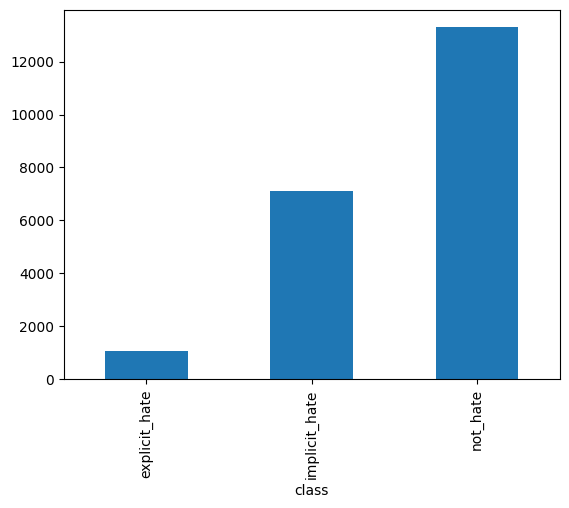

In [11]:
df_hate.groupby(['class'])['post'].count().plot(kind='bar')

### Creation of test dataset

In [12]:
# size : 15% of original dataset (considering only implicit_hate and not_hate)
df_test = df_hate[df_hate['class'] != 'explicit_hate'].sample(3000)

In [13]:
df_test.head()

,post_id,post,class
12043,12044,"black supremacist screaming "" i hate white p...",not_hate
18813,18814,manishankar iyer comment on modi needs no comm...,not_hate
9908,9909,repeating trump's slogan showing he's a bipar...,not_hate
931,932,you know it's #fakenews when an organization c...,implicit_hate
14771,14772,you can larp as a revolutionary all you want b...,not_hate


<Axes: xlabel='class'>

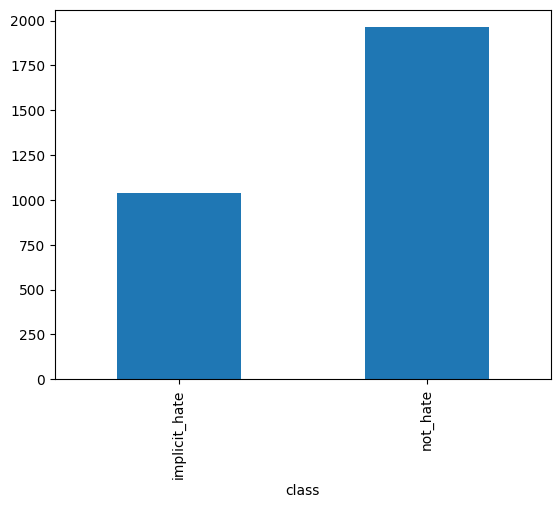

In [11]:
df_test.groupby(['class'])['post'].count().plot(kind='bar')

In [14]:
# Save as csv
df_test.to_csv(data_folder + "implicit_hate_test_stg1.csv", index = False, encoding = 'utf-8')

### Creation of train dataset

In [15]:
df_test = pd.read_csv(data_folder + "implicit_hate_test_stg1.csv", encoding = 'utf-8')

In [16]:
df_train = df_hate[(df_hate['class'] != 'explicit_hate') & (~df_hate['post_id'].isin(df_test['post_id']))].sample(500)

In [17]:
df_train.to_csv(data_folder + "implicit_hate_train_stg1.csv", index = False, encoding = 'utf-8')

<Axes: xlabel='class'>

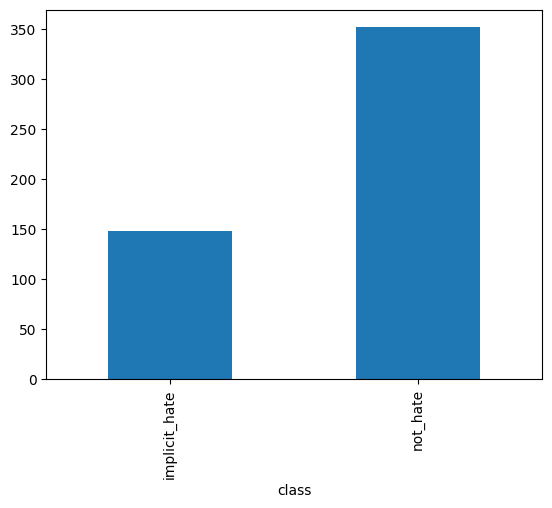

In [18]:
df_train.groupby(['class'])['post'].count().plot(kind='bar')

## Stage 2: Fine-Grained Implicit Hate

In [19]:
df_class = pd.read_csv(corpus_folder + 'implicit_hate_v1_stg2_posts.tsv', sep = '\t')

In [20]:
len(df_class)

6346

In [21]:
df_class.head()

,post,implicit_class,extra_implicit_class
0,""" : jewish harvard professor noel ignatiev w...",white_grievance,NaN
1,rt : tune in today's jmt for my interview w /...,irony,NaN
2,: : hate posters ? you want hate buddy ? read ...,white_grievance,NaN
3,: hunt for white women : black racist serial k...,stereotypical,NaN
4,: looks like he was a fan of the islamic jew-h...,stereotypical,NaN


In [22]:
df_class['implicit_class'].unique()

array(['white_grievance', 'irony', 'stereotypical', 'incitement', 'other',
       'threatening', 'inferiority'], dtype=object)

<Axes: xlabel='implicit_class'>

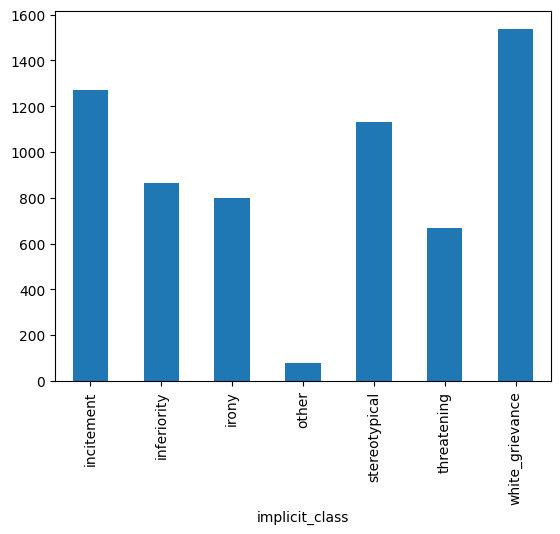

In [23]:
df_class.groupby(['implicit_class'])['post'].count().plot(kind='bar')

### Creation of test dataset

In [24]:
df_test_class = pd.merge(df_test, df_class, on="post")[['post_id', 'post', 'implicit_class']]

In [25]:
df_test_class.head()

,post_id,post,implicit_class
0,932,you know it's #fakenews when an organization c...,white_grievance
1,20399,if they r here illegally & have ties 2 terrori...,threatening
2,7266,the true comparison is what is the ratio of wh...,stereotypical
3,16480,we are living in a country formed for and by w...,incitement
4,6497,yes you are fine in a white majority country ....,inferiority


In [26]:
len(df_test_class)

900

<Axes: xlabel='implicit_class'>

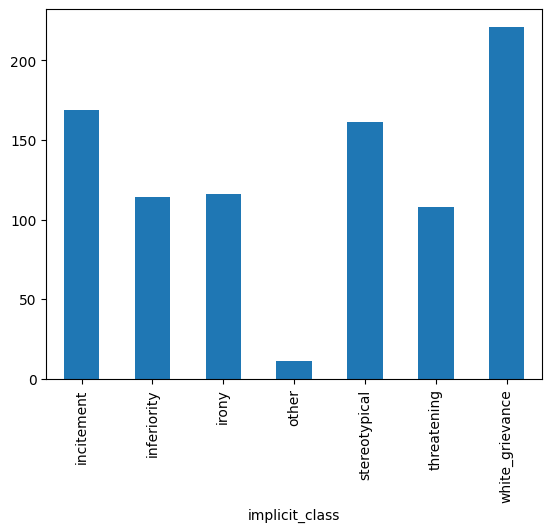

In [27]:
df_test_class.groupby(['implicit_class'])['post_id'].count().plot(kind='bar')

In [28]:
df_test_class.to_csv(data_folder + "implicit_hate_test_stg2.csv", index = False, encoding = 'utf-8')

### Creation of train dataset

In [29]:
df_test_class = pd.read_csv(data_folder + "implicit_hate_test_stg2.csv", encoding = 'utf-8')

In [30]:
df_train_class = pd.merge(df_hate, df_class, on="post")[['post_id', 'post', 'implicit_class']]

In [31]:
df_train_class = df_train_class[~df_train_class['post_id'].isin(df_test_class['post_id'])].sample(1000)

In [32]:
len(df_train_class)

1000

In [33]:
df_train_class.to_csv(data_folder + "implicit_hate_train_stg2.csv", index = False, encoding = 'utf-8')

## Stage 3: Hate Targets and Implied Statement

In [34]:
df_meaning = pd.read_csv(corpus_folder + 'implicit_hate_v1_stg3_posts.tsv', sep = '\t')

In [35]:
len(df_meaning)

12036

In [36]:
df_meaning.head()

,post,target,implied_statement
0,"rt "" white privilege "" "" is when the gun jam...",minority groups,people in minority groups are all in gangs
1,"rt "" white privilege "" "" is when the gun jam...",Black people,Black people are violent
2,if you are white in that state watch yourself !,non-white people,non-white people are dangerous
3,if you are white in that state watch yourself !,white people,White people are in danger.
4,so the 500 % increase in h1b visas ? yeah i'm ...,Immigrants,Immigrants are undesirable


In [37]:
len(df_meaning['post'].unique())

6359

In [38]:
len(df_meaning['target'].unique())

1038

### Creation of test dataset

In [39]:
df_test_meaning = pd.merge(df_test, df_meaning, on="post")[['post_id', 'post', 'target', 'implied_statement']]

In [40]:
df_test_meaning.head()

,post_id,post,target,implied_statement
0,932,you know it's #fakenews when an organization c...,whites,whites are racists
1,932,you know it's #fakenews when an organization c...,Black folks,Black people are racists
2,932,you know it's #fakenews when an organization c...,Liberals,Liberals are liars
3,20399,if they r here illegally & have ties 2 terrori...,Muslims,should be deported.
4,20399,if they r here illegally & have ties 2 terrori...,immigrants,immigrants are terrorists


In [41]:
len(df_test_meaning)

1653

In [42]:
df_test_meaning.to_csv(data_folder + "implicit_hate_test_stg3.csv", index = False, encoding = 'utf-8')

### Creation of train dataset

In [43]:
df_test_meaning = pd.read_csv(data_folder + "implicit_hate_test_stg3.csv", encoding = 'utf-8')

In [44]:
df_train_meaning = pd.merge(df_hate, df_meaning, on="post")[['post_id', 'post', 'target', 'implied_statement']]

In [45]:
df_train_meaning = df_train_meaning[~df_train_meaning['post_id'].isin(df_test_meaning['post_id'])].sample(1000)

In [46]:
df_train_meaning.to_csv(data_folder + "implicit_hate_train_stg3.csv", index = False, encoding = 'utf-8')